In [1]:
# neural prophet
# dataset: covid19
# library

import os
from neuralprophet import NeuralProphet
import pandas as pd

In [21]:
# dataset
DATA_DIR="./data/mhlw"
RAW_DATA = pd.read_csv(os.path.join(DATA_DIR, 'newly_confirmed_cases_daily.csv'), index_col="Date", parse_dates=True)

In [22]:
DATA= RAW_DATA.query('Prefecture == "ALL"')  # 全国のデータ

In [23]:
DATA.head()

,Prefecture,Newly confirmed cases
Date,,
2020-01-26,ALL,1
2020-01-27,ALL,0
2020-01-28,ALL,3
2020-01-29,ALL,1
2020-01-30,ALL,3


In [25]:
# 県名のカラムを削除
df_selected = DATA[['Newly confirmed cases']]

In [27]:
df_selected.head()

,Newly confirmed cases
Date,
2020-01-26,1
2020-01-27,0
2020-01-28,3
2020-01-29,1
2020-01-30,3


In [32]:
df_selected = df_selected.reset_index()

In [33]:
# カラム名をneural prophet用に変更
"""
ds, yの2つのカラムに修正
dsは、日付（2007-12-10）の様なフォーマットに変更
yは、データ
"""

df_selected = df_selected.set_axis({'ds', 'y'}, axis=1)

In [38]:
df = df_selected

In [39]:
# シンプルなモデル
m = NeuralProphet()
metrics = m.fit(df, freq="D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 52


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-05
Epoch[52/52]: 100%|█| 52/52 [00:07<00:00,  6.89it/s, SmoothL1Loss=0.583, MAE=7.6


In [40]:
future = m.make_future_dataframe(df, periods=365)
forecast = m.predict(future)

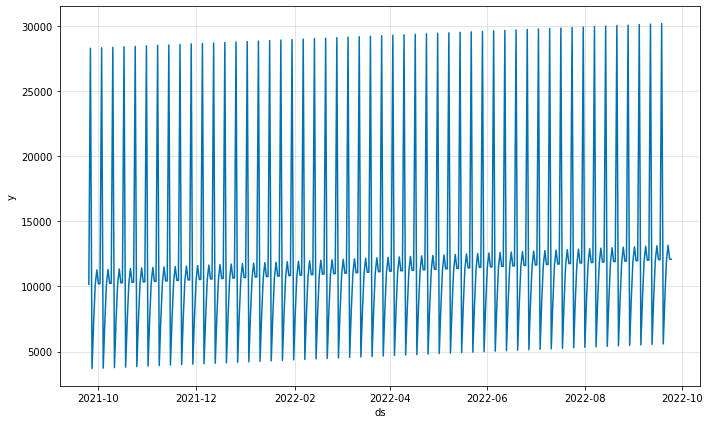

In [41]:
# 予測
forecasts_plot = m.plot(forecast)

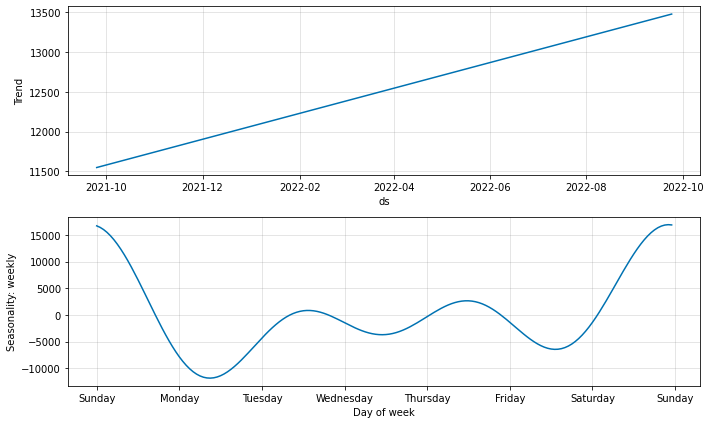

In [42]:
fig_comp = m.plot_components(forecast)

In [43]:
# シンプルなモデル
m = NeuralProphet()
metrics_weeky = m.fit(df, freq="W")

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 52


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[52/52]: 100%|█| 52/52 [00:07<00:00,  6.99it/s, SmoothL1Loss=0.0696, MAE=1.


In [44]:
future_week = m.make_future_dataframe(df, periods=7)
forecast_week = m.predict(future_week)

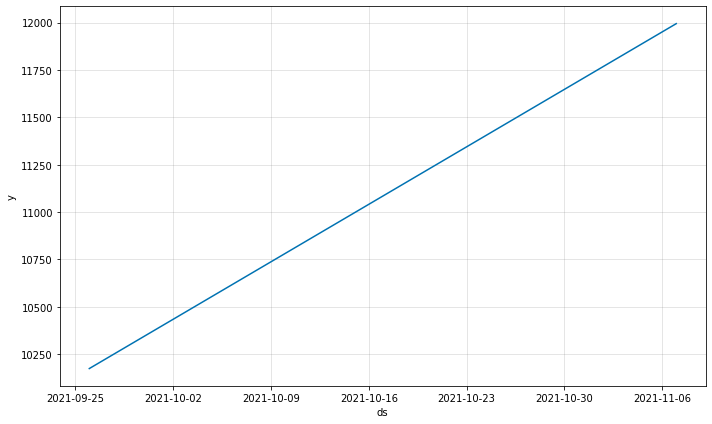

In [45]:
# plot
forecasts_plot = m.plot(forecast_week)

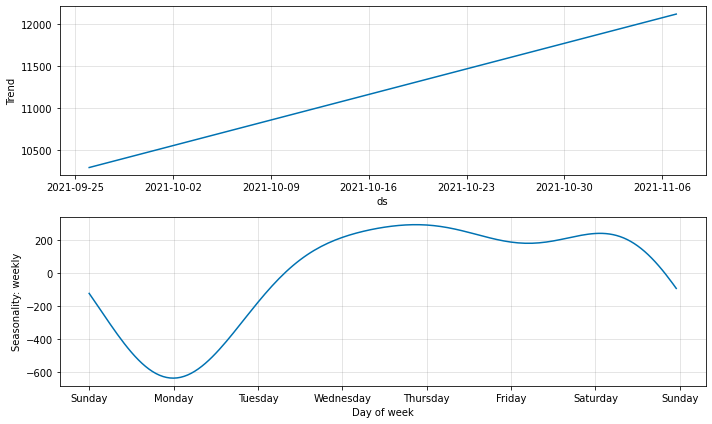

In [46]:
fig_comp_week = m.plot_components(forecast_week)